# Data visualization for example 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
plt.style.use('seaborn-notebook')
from utils import create_files_df, load_temporal_data, load_power_data
%matplotlib inline

## Make a dataframe of file meta data

In [2]:
files_df = create_files_df()
files_df.head()

,dir_name,file_name,path,patient,preictal,train,file_id
0,test_1_new,new_1_1.mat,test_1_new/new_1_1.mat,1,-1,0,0
1,test_1_new,new_1_10.mat,test_1_new/new_1_10.mat,1,-1,0,1
2,test_1_new,new_1_100.mat,test_1_new/new_1_100.mat,1,-1,0,2
3,test_1_new,new_1_101.mat,test_1_new/new_1_101.mat,1,-1,0,3
4,test_1_new,new_1_102.mat,test_1_new/new_1_102.mat,1,-1,0,4


## Get temporal and frequency data for example

In [3]:
inter_ex = files_df[files_df['preictal']==0].iloc[0,:]
pre_ex = files_df[files_df['preictal']==1].iloc[0,:]

time, inter_temp = load_temporal_data(inter_ex['path'])
time, pre_temp = load_temporal_data(pre_ex['path'])
freq, inter_power = load_power_data(inter_ex['path'])
freq, pre_power = load_power_data(pre_ex['path'])

print(inter_temp.shape)
print(pre_temp.shape)
print(inter_power.shape)
print(pre_power.shape)

(16, 240000)
(16, 240000)
(16, 120000)
(16, 120000)


## Plot temporal data per channel 

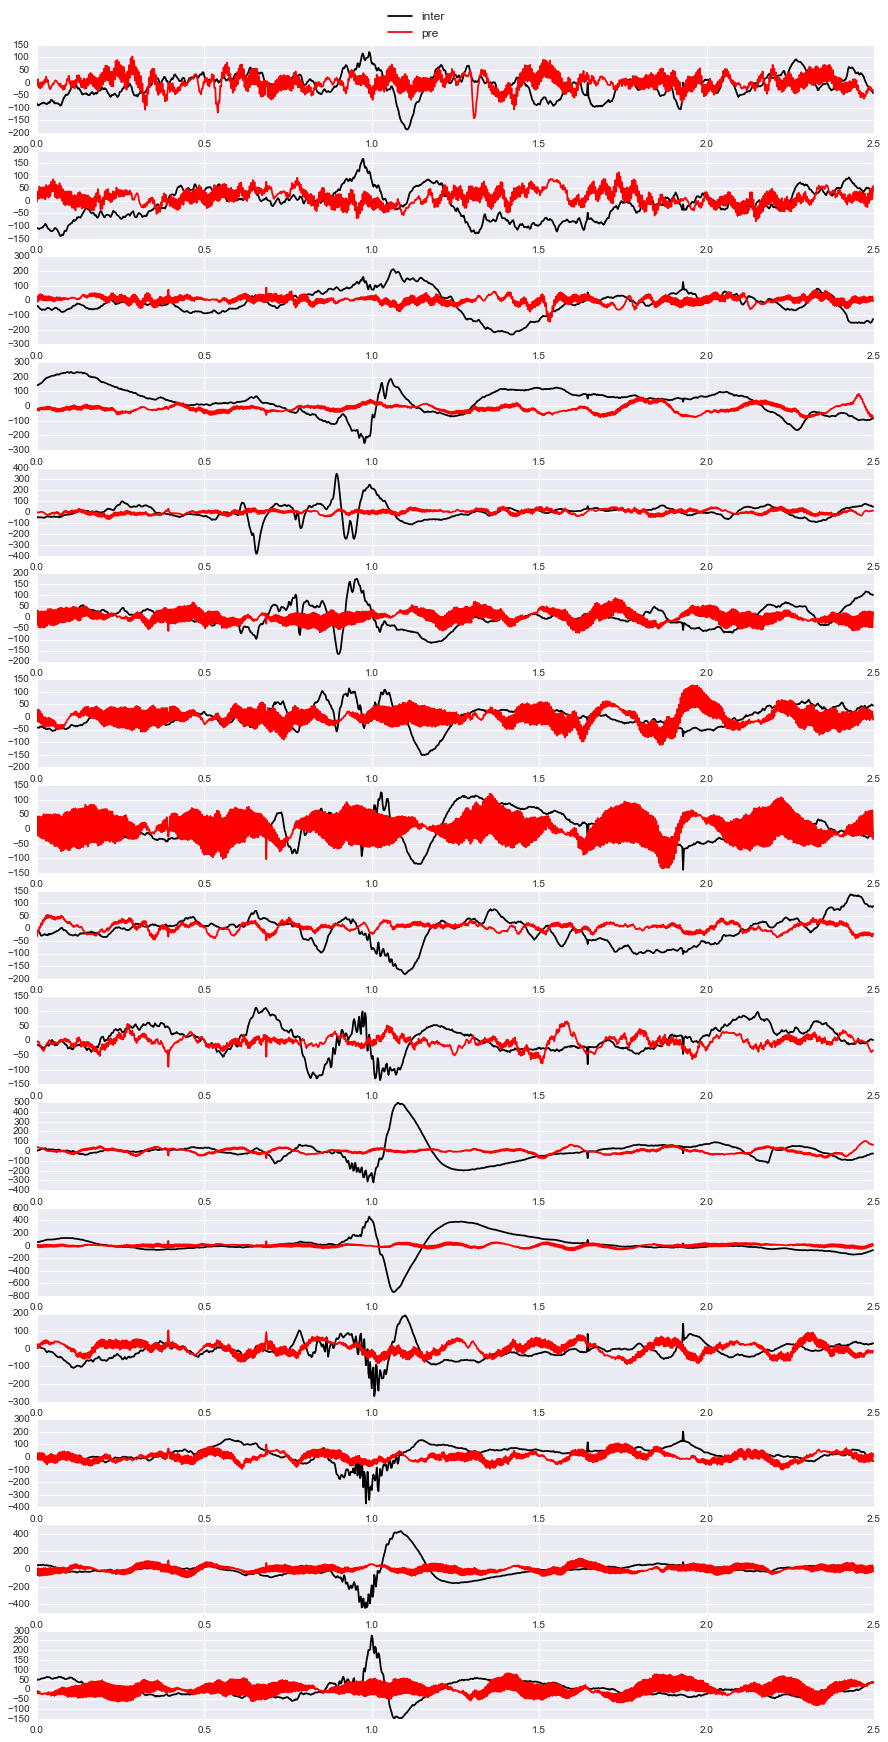

In [5]:
samples = 1000
num_channels = inter_temp.shape[0]
fig, axs = plt.subplots(num_channels, 1, figsize=(15, 30))
for i in range(num_channels):
    axs[i].plot(time[:samples],inter_temp[i,:samples], color='black', label='inter')
    axs[i].plot(time[:samples],pre_temp[i,:samples], color='red', label='pre')
axs[0].legend(loc='upper right', bbox_to_anchor=(.5, 1.5),fontsize=12)
plt.show()

## Plot the frequency data per channel

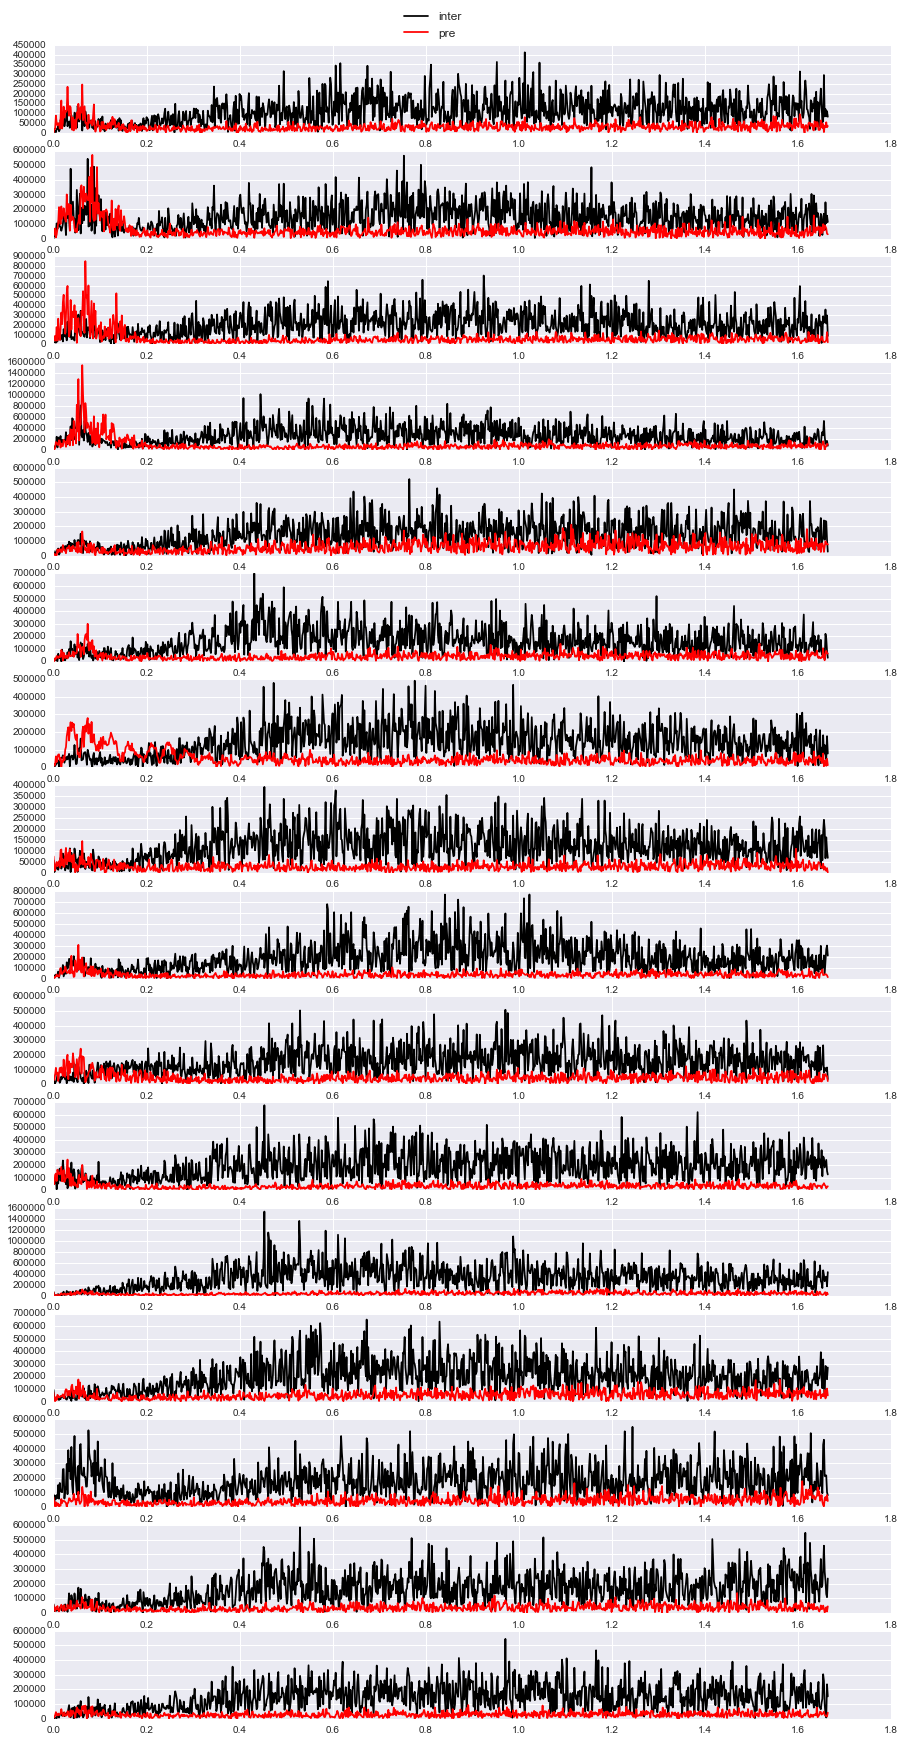

In [6]:
samples = 1000
num_channels = inter_power.shape[0]
fig, axs = plt.subplots(num_channels, 1, figsize=(15, 30))
for i in range(num_channels):
    axs[i].plot(freq[:samples], inter_power[i,:samples], color='black', label='inter')
    axs[i].plot(freq[:samples], pre_power[i,:samples], color='red', label='pre')
axs[0].legend(loc='upper right', bbox_to_anchor=(.5, 1.5),fontsize=12)
plt.show()

## Plot a binned version of power data

In [14]:
# What is the overall power difference per channel?
inter_power.sum(axis=1)-pre_power.sum(axis=1)

array([  5.21157786e+07,   2.19332065e+08,   3.17173596e+08,
         4.71197734e+08,   6.58272914e+08,   3.98490603e+08,
         3.29419140e+08,   3.28297567e+08,   3.57332782e+08,
         5.74277559e+08,   6.32383940e+08,   8.19908032e+08,
         8.14447157e+08,   7.77691427e+08,   7.99986454e+08,
         3.97408943e+08])

In [15]:
# Normalize power spectra
inter_power/sum(inter_power)

array([[  2.84058469e-08,   3.20469995e-02,   2.79034854e-02, ...,
          8.30651467e-02,   3.12740218e-02,   9.69792302e-02],
       [  1.19095049e-03,   1.81612817e-01,   4.32235301e-02, ...,
          4.49435347e-02,   9.33490911e-02,   4.02691253e-02],
       [  3.90531896e-02,   7.53297828e-02,   5.28972983e-02, ...,
          5.45628101e-02,   4.75684251e-02,   4.85932644e-02],
       ..., 
       [  1.36348048e-01,   1.12473563e-01,   1.88583368e-01, ...,
          7.82551665e-02,   8.13498220e-02,   8.58109078e-02],
       [  9.28699436e-02,   4.63260008e-02,   4.74857978e-02, ...,
          2.39666010e-02,   4.18069786e-02,   8.42854464e-02],
       [  2.03133801e-02,   1.27705557e-02,   2.05293001e-02, ...,
          2.29694943e-03,   6.94358386e-02,   4.03069238e-03]])